# Overfitting vs Underfitting

Overfitting is a model that is too complex and learns the *noise* or random fluctuations in the training data, leading to excellent performance on training data but poor generalization to new, unseen data.  
In contrast, underfitting is when a model is too simple and fails to capture the underlying patterns or signal in the data, resulting in poor performance on both the training and test datasets.  
The goal is to find a **good fit** or a balanced model that generalizes well to new data.  

---

## Overfitting
**What it is:**  
A model that is too complex, memorizing the training data, including its noise and outliers.  

**Symptoms:**  
- Excellent performance on the training data  
- Very poor performance on new, unseen (test) data  

**Analogy:**  
A student who memorizes the answers for a practice test but doesn't understand the actual subject.  

**Causes:**  
- A model that is too complex  
- Insufficient training data  
- Noisy training data  

---

## Underfitting
**What it is:**  
A model that is too simple, failing to learn the important patterns in the data.  

**Symptoms:**  
- Poor performance on both the training data and new data  
- Model cannot capture the data's relationships  

**Analogy:**  
A student who doesn't study enough and fails both the practice test and the final exam.  

**Causes:**  
- A model that is too simple  
- Insufficient training time  
- Lack of sufficient input features  


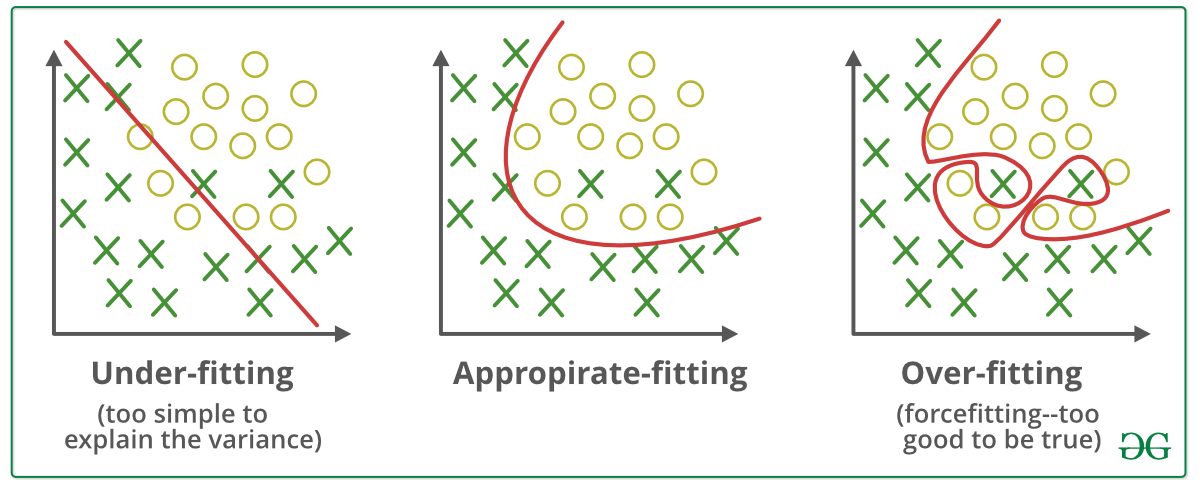

# Bias-Variance Tradeoff

The **Bias-Variance Tradeoff** is a fundamental concept in machine learning that describes how a model's error breaks down when making predictions on unseen data.  
It essentially separates the two primary sources of error: **Bias** and **Variance**.

---

## Bias (Underfitting)
**Definition:**  
Bias is the error introduced by simplifying the model, leading to its inability to learn the true relationship between inputs and outputs in the training data.

**High-Bias Models:**  
- The model is too simple (e.g., using a straight line to fit a curve)  
- Fails to capture complex patterns  
- Results in **underfitting** → poor performance on both training and test data  
---

## Variance (Overfitting)
**Definition:**  
Variance is the error introduced by the model's excessive sensitivity to small fluctuations in the training data.

**High-Variance Models:**  
- The model is too complex  
- Learns the noise (random errors) in the training data along with real patterns  
- Results in **overfitting** → excellent performance on training data, but poor generalization to unseen data  

**Analogy:**  
The model memorizes every specific detail and random error in the training set.  
When a new dataset with different noise comes along, the model gets confused and its performance collapses.  
This sensitivity is the **variance**.

---

## The Bias-Variance Tradeoff
The Bias-Variance Tradeoff refers to the realization that reducing one type of error often leads to an increase in the other.  
The ultimate goal is to find the optimal balance where the sum of both bias and variance (and thus the total prediction error) is minimized.

---

## The Relationship

### Simple Models (High Bias, Low Variance)
- **High Bias:** Too simple → cannot capture complex patterns (**Underfitting**)  
- **Low Variance:** Predictions remain stable even if training data changes  

### Complex Models (Low Bias, High Variance)
- **Low Bias:** Can fit the training data almost perfectly  
- **High Variance:** Too sensitive to noise → fails on unseen data (**Overfitting**)  

---

## The Goal
Achieve the **optimal model complexity**—the *sweet spot*—where both bias and variance are low enough to minimize the **Generalization Error** (the overall error on unseen data).

---

## Strategies for Managing the Tradeoff
### Cross-Validation  
**What it does:**  
- Estimates model performance on unseen data  
- Helps detect overfitting or underfitting early  

**Tools:**  
- `KFold`, `StratifiedKFold` (from `sklearn.model_selection`)  

---

### Regularization (Lasso / Ridge)  
**What it does:**  
- Adds penalty to large weights in the model  
- Reduces model complexity → lowers variance  

**Tools:**  
- `Ridge`, `Lasso` (from `sklearn.linear_model`)  
- `ElasticNet` (combination of L1 and L2)  

---

### Hyperparameter Tuning  
**What it does:**  
- Controls model complexity by adjusting parameters (e.g., tree depth, learning rate, number of layers)  
- Balances bias and variance by finding optimal settings  

**Tools:**  
- `GridSearchCV` (exhaustive search)  
- `RandomizedSearchCV` (random search over parameters)  
- `Optuna`, `Hyperopt`, or `BayesianOptimization` (advanced tuning libraries)  

---

### Ensemble Methods  
**What it does:**  
- Combine multiple models to reduce variance and improve generalization  
- Averaging (bagging) or weighting (boosting) helps stabilize predictions  

**Tools:**  
- `RandomForestClassifier`, `RandomForestRegressor`  
- `GradientBoosting`, `XGBoost`, `LightGBM`, `CatBoost`  






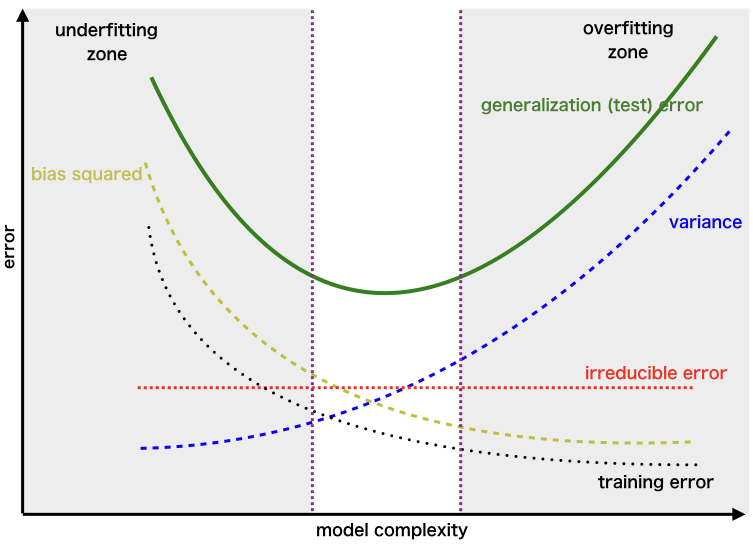

# Gradient Descent

**Gradient Descent** is an optimization algorithm used to find the local minimum of a differentiable function.  
In machine learning, it's the core method for minimizing the **Cost Function (loss function)** of a model.

---

## What is Gradient Descent?

Imagine you're standing on a mountain blindfolded and your goal is to reach the valley floor as quickly as possible.  
You can't see the whole terrain, so you must rely on local information: the slope right under your feet.

- **The Goal:** Find the optimal values for the model's parameters (weights and biases) that result in the lowest possible error.  
- **The Gradient:** The partial derivative of the cost function with respect to the model’s parameters. It tells us the direction of the steepest ascent.  
- **The Descent:** Since the goal is minimization, we move in the **opposite direction** of the gradient (steepest descent).  
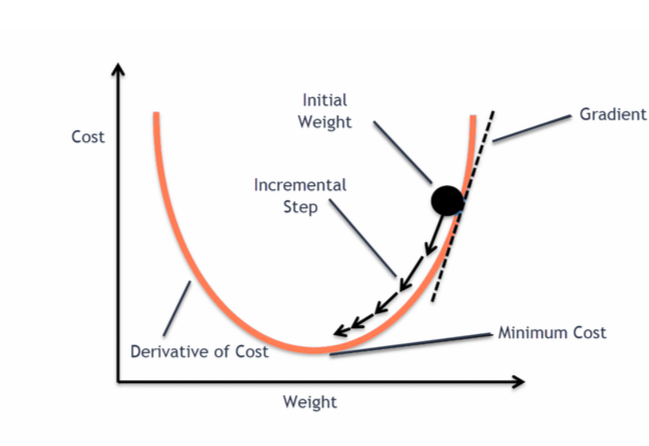

---

## The Update Formula

$$
\theta_{new} = \theta_{old} - \alpha \times \nabla J(\theta_{old})
$$

- **$\theta$** : Model parameters (weights/biases)  
- **$\alpha$ (Learning Rate):** Controls the step size  
- **$\nabla J(\theta)$** : Gradient of the cost function at the current point  

---

## Types of Gradient Descent

The main variants differ in how much data is used to compute the gradient at each update step.

| Type | Data Used per Update | Update Frequency | Primary Tradeoff |
|------|----------------------|------------------|------------------|
| **Batch Gradient Descent (BGD)** | Entire Training Dataset | Once per Epoch | Stable convergence, but slow for large datasets |
| **Stochastic Gradient Descent (SGD)** | One Random Sample | Very Frequent (after every sample) | Fast updates, but noisy path (oscillates). Helps escape local minima |
| **Mini-Batch Gradient Descent (MBGD)** | A Small Subset (e.g., 32 or 64 samples) | Once per Mini-Batch | Best balance between speed and stability. Most commonly used |

---

## Learning Rate (α) and Its Effect

The **Learning Rate ($\alpha$)** is a critical hyperparameter that determines the size of the steps taken toward the minimum.  
It must be carefully tuned to ensure efficient convergence.
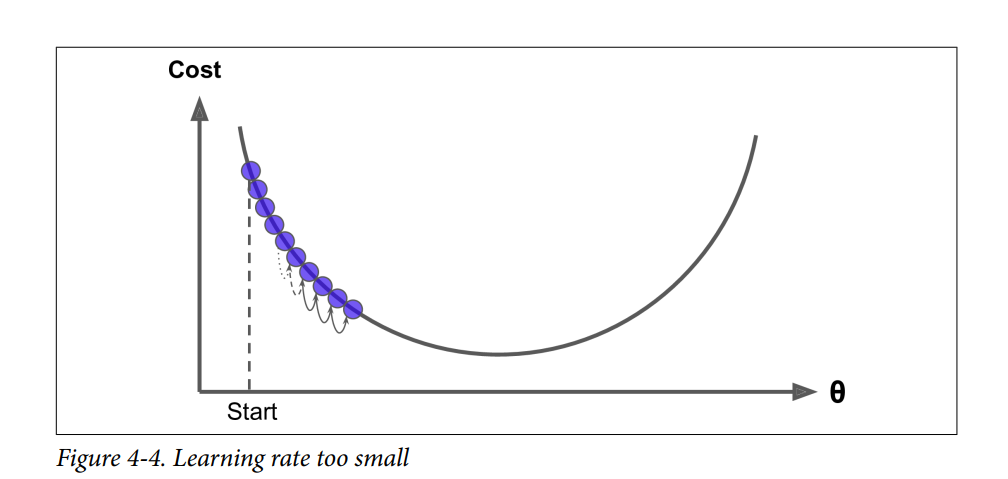
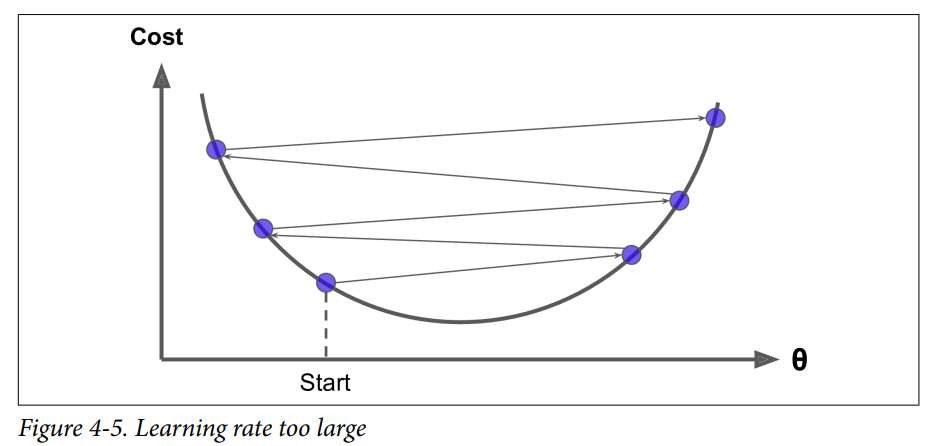

### Effects of Different Learning Rates
- **Too Small:**  
  - The model learns very slowly  
  - Requires many epochs to converge → impractical  

- **Too Large:**  
  - Steps overshoot the minimum  
  - Loss may diverge or oscillate without convergence  

- **Optimal Learning Rate:**  
  - Smooth and efficient convergence to the minimum  

---

## Modern Practices

In deep learning, the learning rate is often **dynamically adjusted** during training:  
- **Learning Rate Schedules** (e.g., step decay, exponential decay, cosine annealing)  
- **Adaptive Optimizers:**  
  - Adam  
  - RMSProp  
  - Adagrad  

These optimizers adapt the learning rate individually for each parameter, often leading to faster and more stable convergence.  


# Loss Functions in Machine Learning

Loss Functions (also known as *Cost Functions* or *Objective Functions*) quantify the error between a model's predicted output and the actual true value.  
- The goal of any machine learning model (especially when using **Gradient Descent**) is to **minimize this loss function**.

---

## 1. Mean Squared Error (MSE)
**Definition:**  
One of the most common loss functions, mainly used for **Regression** tasks.  
It calculates the average of the squared differences between actual and predicted values.

**Formula:**

$$
MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

- \( N \): Number of data points  
- \( y_i \): Actual value  
- \( \hat{y}_i \): Predicted value  

**Advantage:** Continuous and differentiable → works well with Gradient Descent.  
**Disadvantage:** Highly sensitive to outliers.  

---

## 2. Mean Absolute Error (MAE)
**Definition:**  
The average of the absolute differences between actual and predicted values.

**Formula:**

$$
MAE = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|
$$

- Errors are treated **linearly** (unlike MSE, which squares them).  

**Advantage:** More robust to outliers.  
**Disadvantage:** Not differentiable at 0 → requires **sub-gradients** or approximations.  

---

## 3️. Hinge Loss
**Definition:**  
A loss function mainly used for **Classification**, especially in **Support Vector Machines (SVMs)**.  
It is designed for binary classification with labels in \(\{ -1, +1 \}\).

**Formula:**

$$
Hinge\ Loss = \frac{1}{N} \sum_{i=1}^{N} \max(0,\ 1 - y_i \cdot \hat{y}_i)
$$

- \( y_i \): True label (±1)  
- \( \hat{y}_i \): Raw model output (score or margin, not the final class)  

🔹 **Behavior:**
- If \( y_i \cdot \hat{y}_i \geq 1 \) → Loss = 0 (correct prediction with margin ≥ 1).  
- If \( y_i \cdot \hat{y}_i < 1 \) → Loss increases linearly.  

**Advantage:** Encourages not only correct classification but also high confidence (margin maximization).  
**Disadvantage:** Not differentiable at \( y_i \cdot \hat{y}_i = 1 \) → requires **sub-gradients**.  

---

# Summary
- **MSE:** Good for regression, but sensitive to outliers.  
- **MAE:** More robust to outliers, but less smooth for optimization.  
- **Hinge Loss:** Great for SVMs and margin-based classification.  


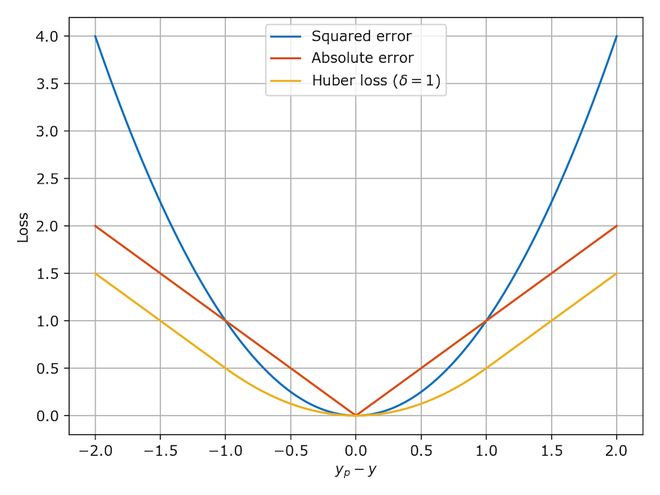

# Distance and Similarity Measures

In machine learning and data analysis, **distance measures** quantify how far apart two data points are in a feature space, while **similarity measures** quantify how alike they are.  
These metrics are fundamental to algorithms like **k-Nearest Neighbors (k-NN)**, **k-Means clustering**, and certain types of **recommender systems**.

---

## 1️. Euclidean Distance (L2 Norm)
**Definition:**  
The straight-line distance between two points in Euclidean space.  
It’s the most common way to measure distance between two vectors.

**Formula:** For two points  
\( P = (p_1, p_2, …, p_n) \) and \( Q = (q_1, q_2, …, q_n) \):

$$
d(P,Q) = \sqrt{ \sum_{i=1}^n (p_i - q_i)^2 }
$$

**Use Case:**  
- Works well when the raw magnitude of feature differences matters.  
- Sensitive to feature scales → usually requires **normalization**.  

---

## 2.  Minkowski Distance (Lp Norm)
**Definition:**  
A generalization of both Euclidean Distance and Manhattan Distance, controlled by a parameter \( p \).  

**Formula:**

$$
d(P,Q) = \left( \sum_{i=1}^n |p_i - q_i|^p \right)^{\frac{1}{p}}
$$

**Special Cases:**
**p = 1 : Manhattan Distance (L1 Norm)**  
$$
d(P,Q) = \sum_{i=1}^n |p_i - q_i|
$$
Like navigating along a city grid (block-by-block distance).

**p = 2 : Euclidean Distance (L2 Norm)**  
Standard straight-line distance.

**p → ∞ : Chebyshev Distance (L∞ Norm)**  
$$
d(P,Q) = \max_i |p_i - q_i|
$$
The largest coordinate difference dominates the distance.

  The largest coordinate difference dominates the distance.  

**Use Case:**  
- Flexible → allows tuning sensitivity to large differences.  
- Larger \( p \) penalizes big differences more strongly (similar to MSE vs. MAE in regression).  

---

## 3️.Cosine Distance and Similarity
**Definition:**
- **Cosine Similarity** measures the cosine of the angle between two non-zero vectors.  
- **Cosine Distance** is derived as \( 1 - \) Cosine Similarity.  

**Formula (Similarity):**

$$
Similarity(A,B) = \cos(\theta) = \frac{A \cdot B}{\|A\| \cdot \|B\|}
$$

- Range: \([-1, 1]\)  
  - 1 → perfectly similar (same direction)  
  - 0 → orthogonal (no relation)  
  - -1 → perfectly opposite  

**Formula (Distance):**

$$
Distance(A,B) = 1 - Similarity(A,B)
$$

- Range: \([0, 2]\)  
  - 0 → most similar  
  - 2 → most dissimilar  

**Use Case:**  
- Effective in **high-dimensional data** such as **text analysis (NLP)**.  
- Ignores magnitude → focuses only on orientation (topic distribution).  
- Example: A short article and a long article about the same topic will have high cosine similarity.  



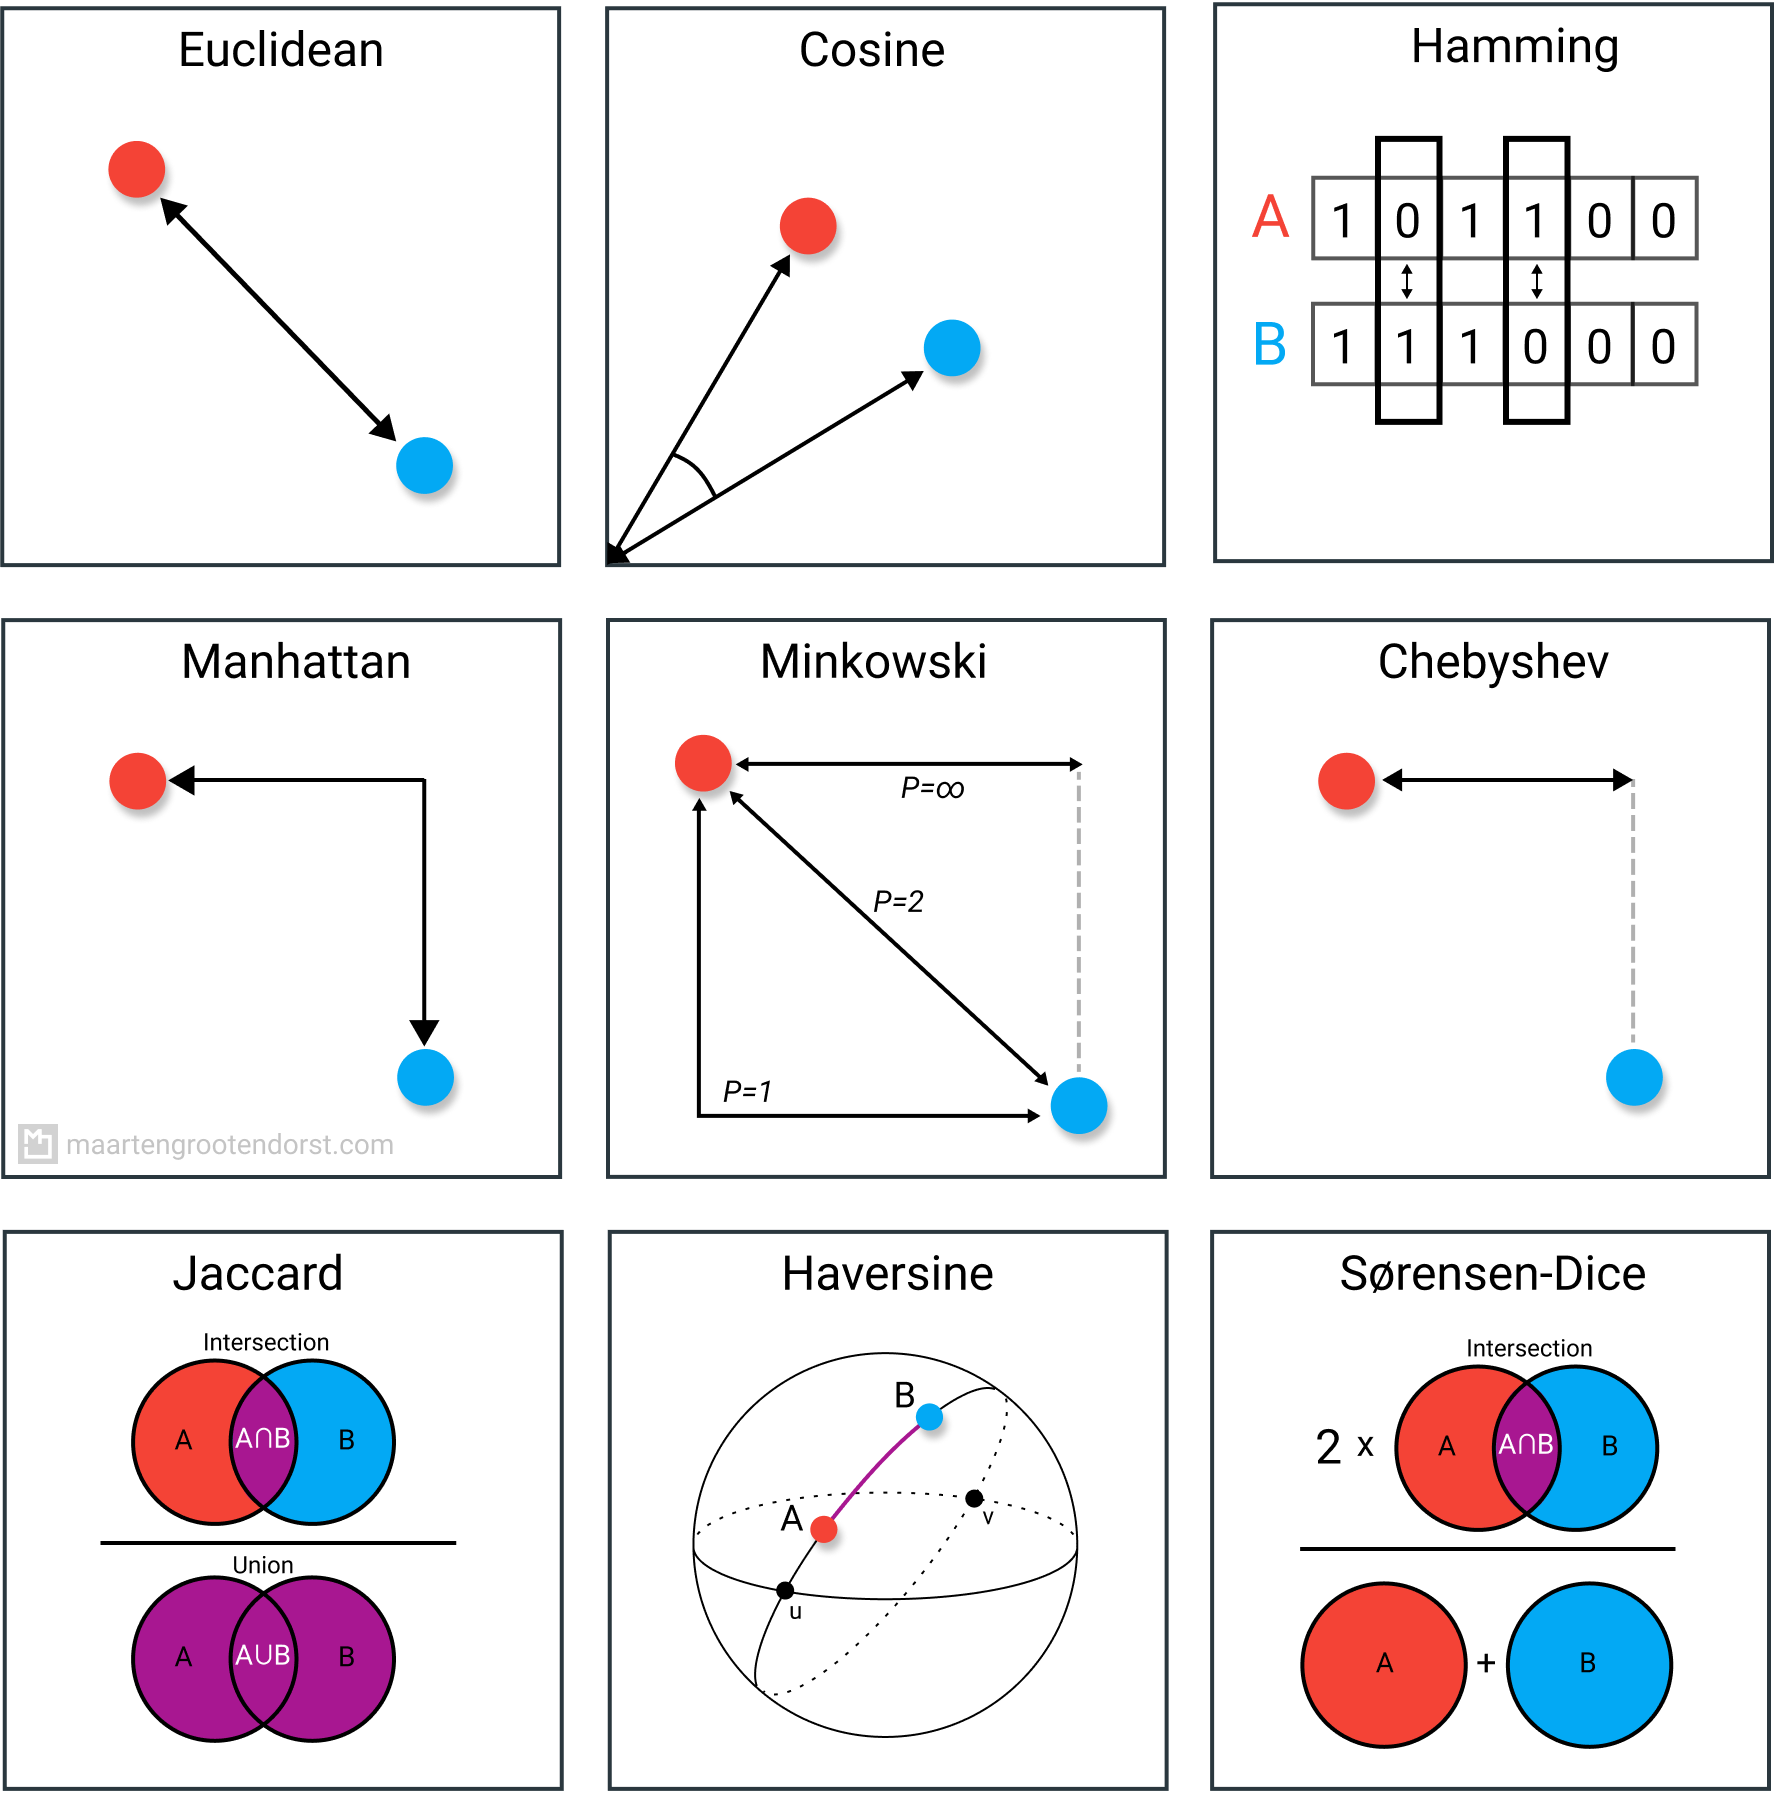

# Regularization: An Overview

Regularization is a technique used in machine learning to **prevent overfitting** by discouraging overly complex models. It achieves this by adding a **penalty term** to the model's original **Loss Function**.

This penalty is based on the **magnitude of the model's parameters (weights)**. It penalizes large weights, forcing the model to focus on the essential patterns rather than memorizing the noise in the training data, thereby improving **generalization**.

---

### Common Types:

1.  **L2 Regularization (Ridge):**
    * The penalty is the **sum of the squares** of the weights.
    * It shrinks weights close to zero but **does not force them to be exactly zero**.

2.  **L1 Regularization (Lasso):**
    * The penalty is the **sum of the absolute values** of the weights.
    * It has the ability to set the weights of irrelevant features to **exactly zero**, performing **automatic feature selection (sparsity)**.

---

**Reference Note:**
This topic was previously covered in detail, including formulas and the effect of the $\lambda$ hyperparameter, in the module on [Regression](https://github.com/MohsenSafari83/Supervised-Learning-/tree/main/Linear%20Regression) .

# Softmax Function and Cross-Entropy Cost

The Softmax function and the Cross-Entropy Cost Function (often just called Cross-Entropy Loss) are almost always paired together in the final layer of a neural network designed for multi-class classification problems.

---

## 1. Softmax Function

The Softmax function is an activation function used in the output layer of a neural network. It converts a vector of raw prediction scores (called logits) into a vector of probabilities that sum to 1.

**Input:** A vector of raw scores,  
$$
z = [z_1, z_2, \dots, z_K]
$$  
where $K$ is the number of classes.

**Output:** A vector of probabilities,  
$$
\hat{y} = [\hat{y}_1, \hat{y}_2, \dots, \hat{y}_K]
$$

**Formula:** For a single class $j$:

$$
\hat{y}_j = \text{Softmax}(z_j) = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}
$$

**Key Properties:**

- **Probability Interpretation:** Each output $\hat{y}_j$ is between 0 and 1, representing the estimated probability that the input belongs to class $j$.
- **Normalization:** The sum of all output probabilities is 1:  
  $$
  \sum_{j=1}^{K} \hat{y}_j = 1
  $$
- **"Soft Max":** Unlike the "hard max" function (which just picks the largest score), Softmax ensures that a larger input score ($z_j$) always results in a larger probability, but it also exaggerates the differences between the scores, making the largest probability much closer to 1.

---

## 2. Cross-Entropy Cost Function (Log Loss)

The Cross-Entropy function measures the performance of a classification model whose output is a probability value between 0 and 1. It is the standard loss function used with the Softmax output layer.

**Concept:** Cross-Entropy measures the difference between two probability distributions: the predicted probability distribution ($\hat{y}$) and the true probability distribution ($y$). The true distribution is typically a one-hot encoded vector (e.g., if the true class is 3 out of 5, $y = [0,0,1,0,0]$).

**Formula (for a single training example):**

$$
J(\hat{y}, y) = - \sum_{j=1}^{K} y_j \log(\hat{y}_j)
$$

Where:  
- $y_j$: The true probability for class $j$ (0 or 1 in one-hot encoding).  
- $\hat{y}_j$: The predicted probability for class $j$ (from Softmax).

**Key Benefit (Simplification):** Since $y$ is one-hot encoded (only the true class $c$ has $y_c = 1$, and all others are 0), the sum simplifies to:

$$
J(\hat{y}, y) = - \log(\hat{y}_c)
$$

This means the loss is calculated based only on the predicted probability of the correct class, $\hat{y}_c$.

**Behavior:**

- If the model is highly confident in the correct class (i.e., $\hat{y}_c \to 1$), the term $\log(\hat{y}_c)$ approaches 0, and the Loss approaches 0.
- If the model predicts a very low probability for the correct class (i.e., $\hat{y}_c \to 0$), the term $\log(\hat{y}_c)$ approaches $-\infty$, and the Loss approaches $\infty$ (a huge penalty).

---

## The Perfect Pairing: Softmax + Cross-Entropy

In neural networks, Softmax and Cross-Entropy are used together because the derivative (gradient) of the Cross-Entropy loss with respect to the pre-Softmax scores ($z$) is remarkably simple:

$$
\frac{\partial J}{\partial z_j} = \hat{y}_j - y_j
$$

This simple and elegant gradient calculation is essential for the efficient training of neural networks using backpropagation, as it avoids numerical instabilities that could arise from complex derivatives, leading to faster and more stable convergence.


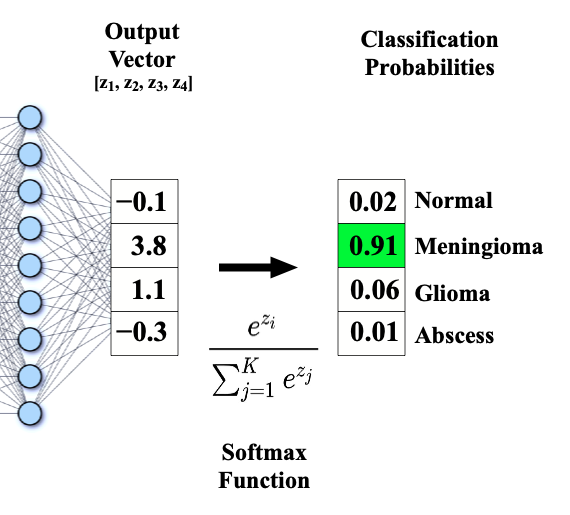

## Gradient Descent with Softmax

You don't apply Gradient Descent directly to Softmax; instead, you apply it to the **Loss Function** that uses the Softmax output, which is typically **Cross-Entropy Loss**.

The Softmax function is the last activation layer, and its output is used by the Cross-Entropy Loss function to calculate the error. Gradient Descent then minimizes this loss by adjusting the weights.

---

## Gradient Calculation for Softmax + Cross-Entropy

The power of using Softmax with Cross-Entropy Loss is that the **gradient calculation**—a crucial step for Gradient Descent—becomes surprisingly simple and numerically stable.

Let:

- $z_j$ be the raw score (logit) for class $j$ (the input to Softmax).  
- $\hat{y}_j$ be the predicted probability for class $j$ (the output of Softmax).  
- $y_j$ be the true one-hot encoded label for class $j$.  
- $J$ be the Cross-Entropy Loss for a single example.  

The goal of Gradient Descent is to find the gradient of the loss with respect to the pre-Softmax scores:

$$
\frac{\partial J}{\partial z_j}
$$

---

### 1. The Simple Gradient

The partial derivative of the Cross-Entropy Loss with respect to the input logits of the Softmax layer is remarkably clean:

$$
\frac{\partial J}{\partial z_j} = \hat{y}_j - y_j
$$

---

### 2. Gradient Descent Update

This simple gradient is then used in the **backpropagation process** to update the weights ($W$) and biases ($b$) of the layer preceding the Softmax layer, using the standard Gradient Descent update rule (where $\alpha$ is the learning rate):

$$
W_{\text{new}} = W_{\text{old}} - \alpha \frac{\partial J}{\partial W}
$$

$$
b_{\text{new}} = b_{\text{old}} - \alpha \frac{\partial J}{\partial b}
$$

---

## Summary

The backpropagation process effectively uses the **difference between the predicted probability ($\hat{y}_j$) and the true label ($y_j$)** as the primary error signal to drive the parameter updates in Gradient Descent:

- If the model is confident and correct ($\hat{y}_j \approx 1$ and $y_j = 1$), the gradient is near zero, and the weights change very little.  
- If the model is confident and wrong, the large gradient forces significant weight adjustments.

For a deeper understanding and practical implementation of gradient descent in the Softmax layer, you can check out this detailed article:

[Gradient descent on a Softmax cross-entropy cost function](https://madalinabuzau.github.io/2016/11/29/gradient-descent-on-a-softmax-cross-entropy-cost-function.html)

The article provides step-by-step explanations, Python code, and examples for practical implementation.
